In [ ]:
 !pip install pandas
!pip install matplotlib
!pip install seaborn

^C


In [13]:
import pandas as pd

# Configuration

In [14]:
data_path = "D:\datasets\cv-corpus-19.0-2024-09-13-fr\cv-corpus-19.0-2024-09-13\\fr"

In [15]:
# Load the data
data = pd.read_table(f"{data_path}/validated.tsv")

In [16]:
print(len(data))
print(data.columns)

122
Index(['client_id', 'path', 'sentence_id', 'sentence', 'sentence_domain',
       'up_votes', 'down_votes', 'age', 'gender', 'accents', 'variant',
       'locale', 'segment'],
      dtype='object')


In [17]:
data.head()

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,28c575f5124adf57beac0b04fe92547753b12fa0532cd7...,common_voice_fr_41155447.mp3,506eccdacf3f95785eb834078fbba9f21528b8dfc3443b...,Les premiers jeux d'aventure étaient proposés ...,NaN,2,0,twenties,male_masculine,Français de France,NaN,fr,NaN
1,2ca636c915df1f93af996708934a5ea7eb437dfded2301...,common_voice_fr_40884068.mp3,5024ba6c9b8b5e5ef6ab558b8a8cad350e2d349c59cfb5...,"L'église de la Sainte Trinité, est le dernier ...",NaN,2,1,NaN,NaN,NaN,NaN,fr,NaN
2,2f910f0a334cca42fa8990836000a82591fd4009a77dd9...,common_voice_fr_40874512.mp3,10690cde59ba239e868484010224033a8b322868f4c55a...,Nana jouait la modestie.,NaN,2,0,NaN,NaN,NaN,NaN,fr,NaN
3,511264734314cf575a3a723d05d122097c24a8d02946f1...,common_voice_fr_41020281.mp3,5040eb8588942f2ceb70118bdd6e0f15d16cca9e47dc69...,Plusieurs membres sont tués et leurs découvert...,NaN,2,0,NaN,NaN,NaN,NaN,fr,NaN
4,717119c5871d1bb81cea5e8888a94c3a540c1ba5f50032...,common_voice_fr_41034068.mp3,5054ad65be62040b0c46fc617b7dc113186f7b5f4aad14...,Mais le projet prit du retard par manque de fi...,NaN,2,0,fourties,male_masculine,Français de France,NaN,fr,NaN


In [18]:
data.describe()

,up_votes,down_votes,variant,segment
count,122.000000,122.000000,0.0,0.0
mean,2.131148,0.008197,NaN,NaN
std,0.480200,0.090536,NaN,NaN
min,2.000000,0.000000,NaN,NaN
25%,2.000000,0.000000,NaN,NaN
50%,2.000000,0.000000,NaN,NaN
75%,2.000000,0.000000,NaN,NaN
max,4.000000,1.000000,NaN,NaN


In [19]:
# Hunt NaN values
data.isna().sum()

client_id            0
path                 0
sentence_id          0
sentence             0
sentence_domain    121
up_votes             0
down_votes           0
age                 30
gender              94
accents             11
variant            122
locale               0
segment            122
dtype: int64

In [30]:
# Print every unique value for each column
columns_to_print = ['sentence_domain', 'age', 'gender', 'accents', 'variant',
       'locale', 'segment']
data_selected_to_print = data[columns_to_print]
for column in columns_to_print:
    print(f"{column}: {data[column].unique()}")

sentence_domain: [nan 'general']
age: ['twenties' nan 'fourties' 'thirties' 'teens']
gender: ['male_masculine' nan 'female_feminine']
accents: ['Français de France' nan 'Français du Maroc'
 'Français de Belgique,Français des Pays-Bas'
 'Français du sud de la France' 'Français du Congo (Kinshasa)'
 'Français du Canada']
variant: [nan]
locale: ['fr']
segment: [nan]


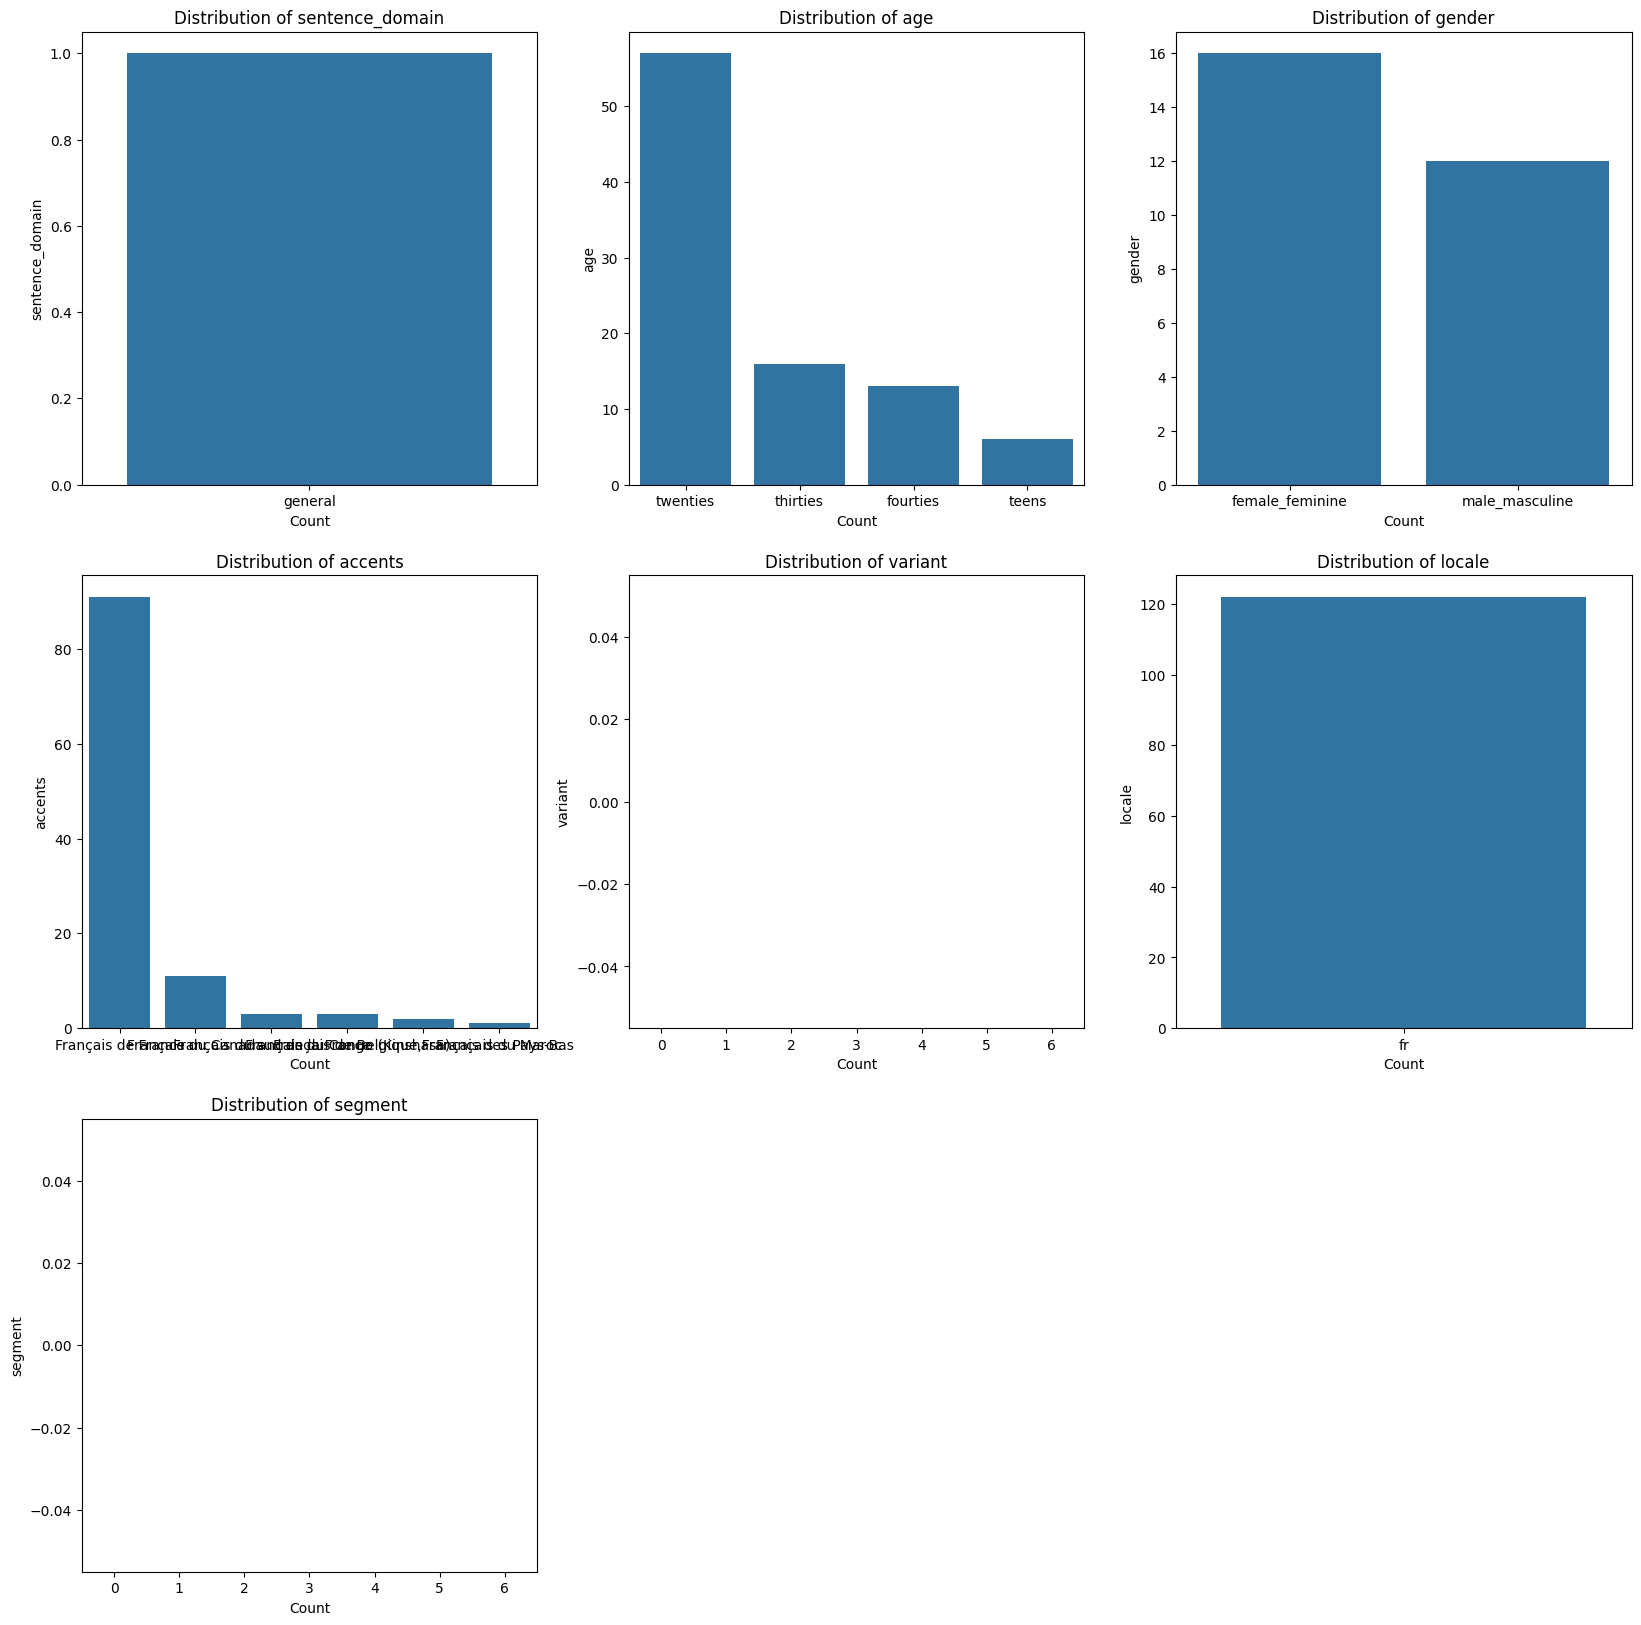

In [32]:
# Visualise repartition of the data
import matplotlib.pyplot as plt
import seaborn as sns

# Plot data distribution for each column
plt.figure(figsize=(20, 20))
for i,column in enumerate(data_selected_to_print.columns):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=column, data=data, order=data_selected_to_print[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
plt.show()

In [34]:
# Draw correlation matrix
# First encode every categorical column
from sklearn.preprocessing import LabelEncoder

data_encoded = data_selected_to_print.copy()



correlation_matrix = data_selected_to_print.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

ValueError: could not convert string to float: 'general'